In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
data=pd.read_csv('Korean_demographics_2000-2022.csv')
data.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [3]:
df=data.fillna(data.mean(numeric_only=True))
df_filtered = df[df['Region'] == 'Whole country'].copy()
df_filtered.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
17,1/1/2000,Whole country,61644.0,15.37,24457.0,6.1,9045.0,2.3,30120.0,7.5,37187.0,9.3
35,2/1/2000,Whole country,56723.0,15.11,20306.0,5.4,9392.0,2.5,26187.0,7.0,36417.0,9.7
53,3/1/2000,Whole country,59878.0,14.91,21592.0,5.4,10878.0,2.7,30418.0,7.6,38286.0,9.5
71,4/1/2000,Whole country,53058.0,13.64,20420.0,5.2,8640.0,2.2,28179.0,7.2,32638.0,8.4
89,5/1/2000,Whole country,52492.0,13.04,19862.0,4.9,10210.0,2.5,35330.0,8.8,32630.0,8.1


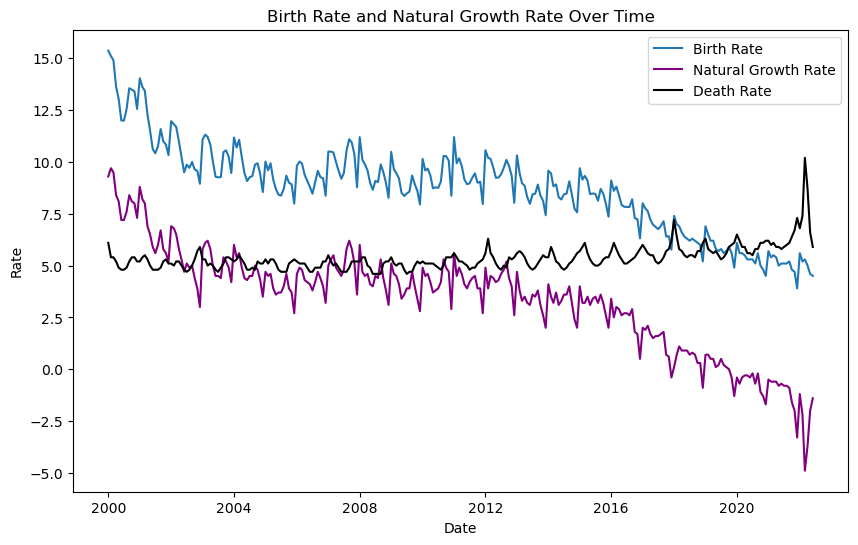

In [4]:
plt.figure(figsize=(10, 6))

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

sns.lineplot(x='Date', y='Birth_rate', data=df_filtered, label='Birth Rate')

sns.lineplot(x='Date', y='Natural_growth_rate', data=df_filtered, color='purple', label='Natural Growth Rate')

sns.lineplot(x='Date', y='Death_rate', data=df_filtered, color='black', label='Death Rate')

plt.title('Birth Rate and Natural Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

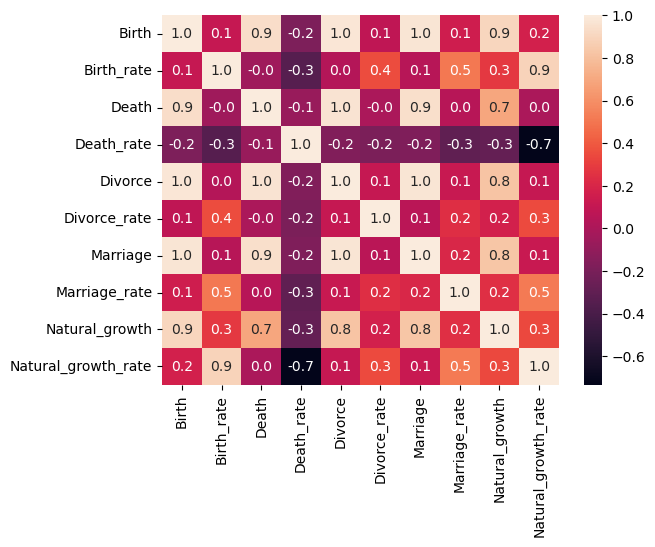

In [5]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()

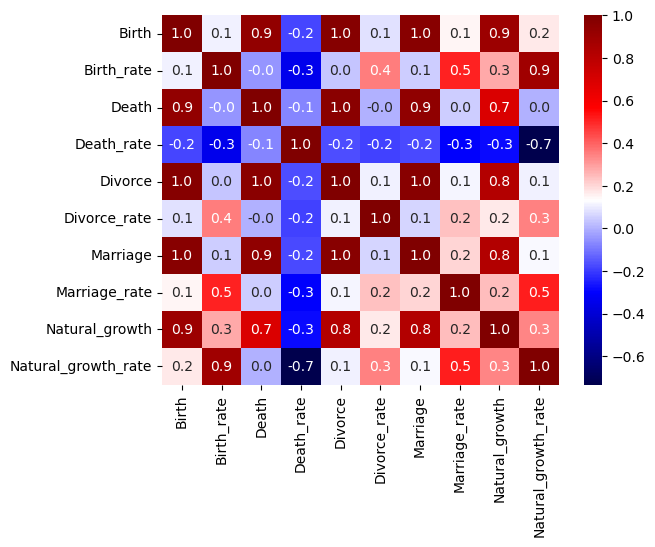

In [6]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr, cmap=plt.cm.seismic, linecolor = 'white', annot=True, fmt='.1f', cbar=True)
plt.show()

<Axes: xlabel='Marriage_rate', ylabel='Birth_rate'>

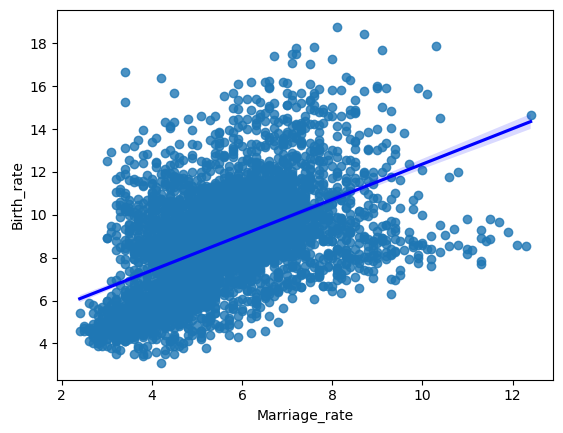

In [7]:
sns.regplot(x='Marriage_rate', y='Birth_rate', data=data, line_kws={'color': 'blue'})

<Axes: xlabel='Divorce_rate', ylabel='Birth_rate'>

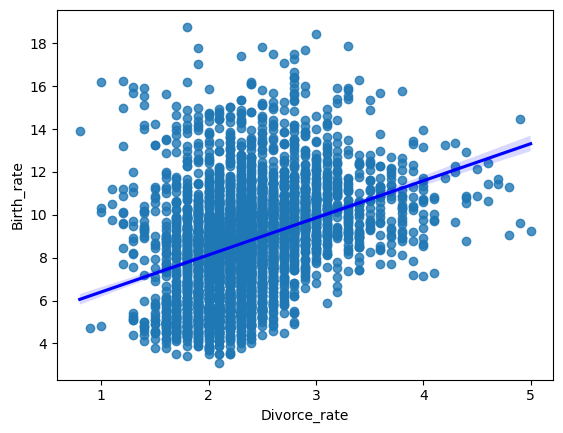

In [8]:
sns.regplot(x='Divorce_rate', y='Birth_rate', data=data, line_kws={'color': 'blue'})

<Axes: xlabel='Marriage_rate', ylabel='Divorce_rate'>

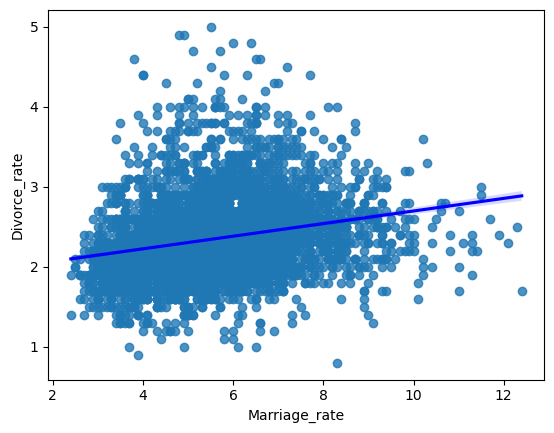

In [9]:
sns.regplot(x='Marriage_rate', y='Divorce_rate', data=data, line_kws={'color': 'blue'})

In [10]:
target = df[['Divorce_rate']]
x_data = df[["Marriage_rate"]]
x_data1 = sm.add_constant(x_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Divorce_rate   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     287.2
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           1.24e-62
Time:                        13:07:00   Log-Likelihood:                -3177.8
No. Observations:                4860   AIC:                             6360.
Df Residuals:                    4858   BIC:                             6373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9095      0.027     70.946      0.000       1.857       1.962
Marriage_rate     0.0788      0.005     16.947      0.000       0.070       0.088
==============================================================================
Omnibus:                     1075.420   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3116.724
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       6.178   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
target = df[['Birth_rate']]
x_data = df[["Marriage_rate"]]
x_data1 = sm.add_constant(x_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Birth_rate   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1718.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          7.81e-322
Time:                        13:07:00   Log-Likelihood:                -10252.
No. Observations:                4860   AIC:                         2.051e+04
Df Residuals:                    4858   BIC:                         2.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1042      0.115     35.567      0.000       3.878       4.330
Marriage_rate     0.8262      0.020     41.451      0.000       0.787       0.865
==============================================================================
Omnibus:                      310.638   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.244
Skew:                           0.569   Prob(JB):                     7.52e-93
Kurtosis:                       3.895   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

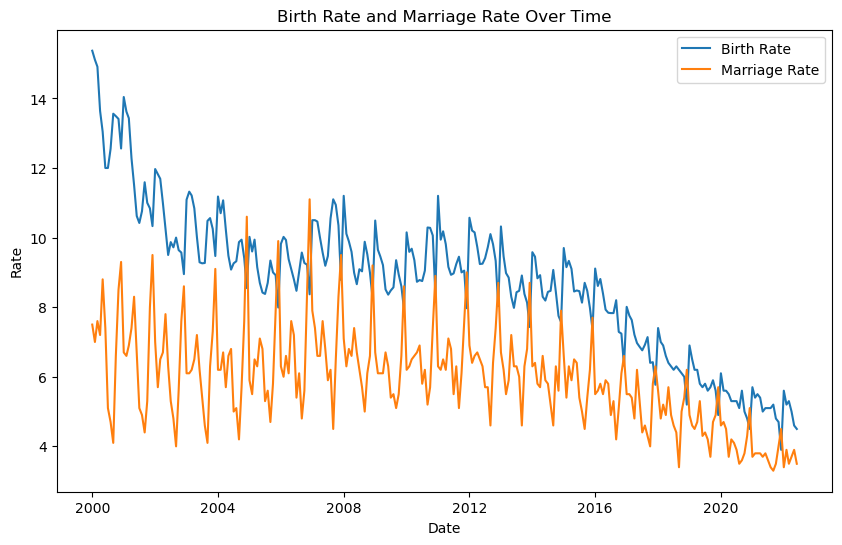

In [12]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Birth_rate', data=df_filtered, label='Birth Rate')

sns.lineplot(x='Date', y='Marriage_rate', data=df_filtered, label='Marriage Rate')

plt.title('Birth Rate and Marriage Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

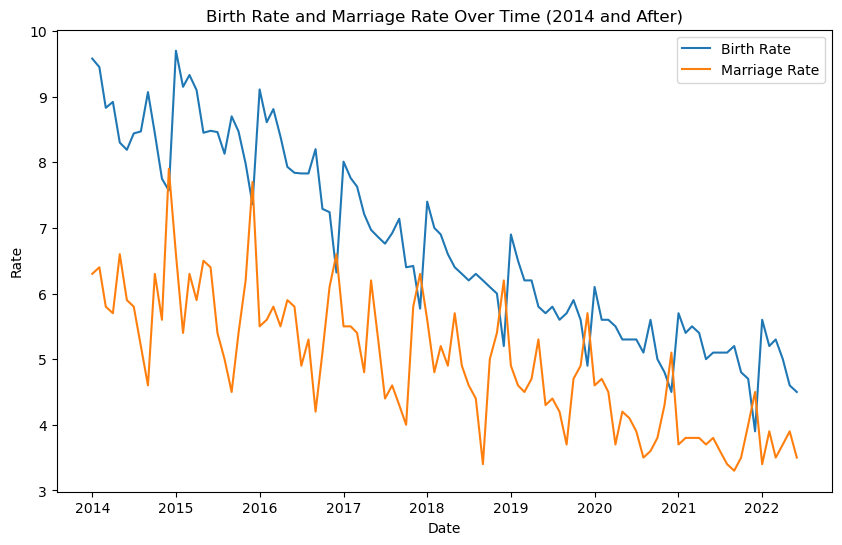

In [13]:
plt.figure(figsize=(10, 6))

df_filtered_2014 = df_filtered[df_filtered['Date'].dt.year >= 2014].copy()

sns.lineplot(x='Date', y='Birth_rate', data=df_filtered_2014, label='Birth Rate')

sns.lineplot(x='Date', y='Marriage_rate', data=df_filtered_2014, label='Marriage Rate')

plt.title('Birth Rate and Marriage Rate Over Time (2014 and After)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

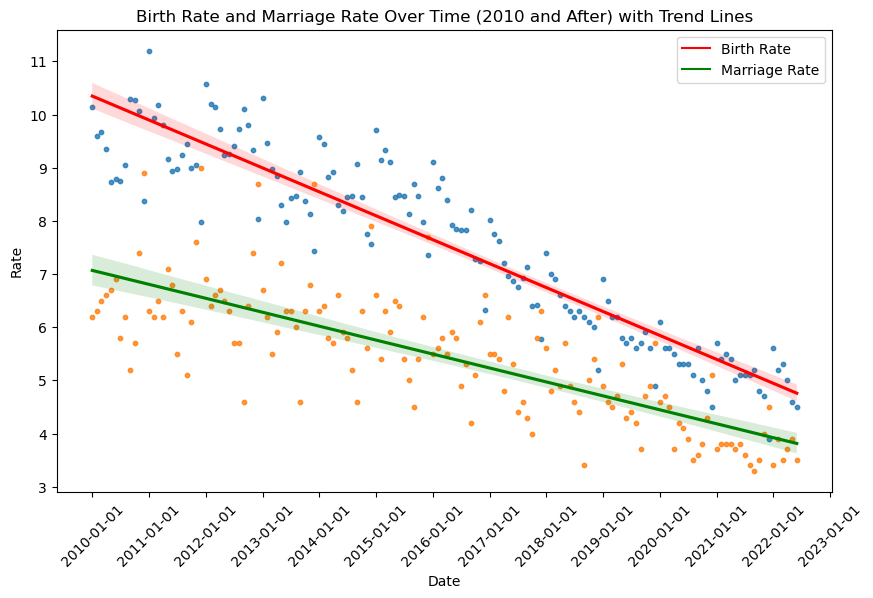

In [14]:
df_filtered_2010 = df_filtered[df_filtered['Date'].dt.year >= 2010].copy()
df_filtered_2010['DateNum'] = mdates.date2num(df_filtered_2010['Date'])

plt.figure(figsize=(10, 6))

legend_elements = [Line2D([0], [0], color='red', label='Birth Rate'),
                   Line2D([0], [0], color='green', label='Marriage Rate')]

sns.regplot(x='DateNum', y='Birth_rate', data=df_filtered_2010, scatter_kws={'s':10}, line_kws={"color": "red"})

sns.regplot(x='DateNum', y='Marriage_rate', data=df_filtered_2010, scatter_kws={'s':10}, line_kws={"color": "green"})

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Birth Rate and Marriage Rate Over Time (2010 and After) with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(handles=legend_elements)
plt.show()

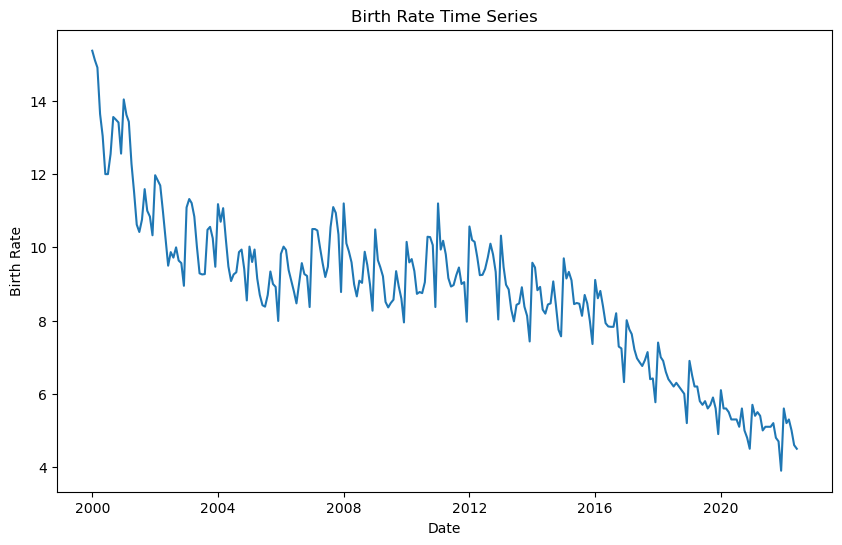

<Figure size 1000x600 with 0 Axes>

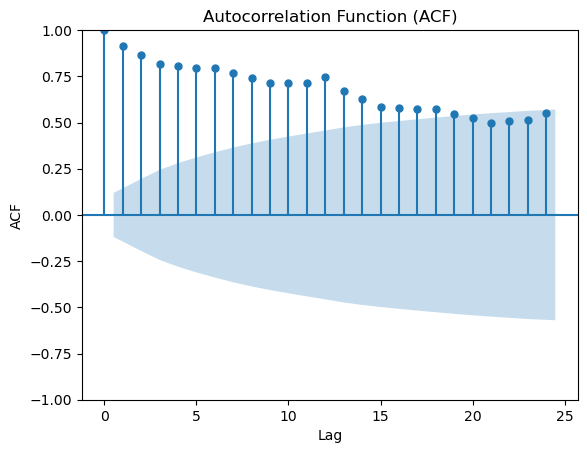

In [15]:
data = pd.read_csv('birth_rate.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Birth_rate 시계열 데이터 플롯
plt.figure(figsize=(10, 6))
plt.plot(data['Birth_rate'])
plt.title('Birth Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Birth Rate')
plt.show()

# 계절성을 확인하기 위한 ACF 플롯
plt.figure(figsize=(10, 6))
plot_acf(data['Birth_rate'], lags=24)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [16]:
df=pd.read_csv('var.csv')
data = df.fillna(method='ffill')
data.head()

,Date,Birth_rate,Marriage_rate
0,1/1/2000,15.37,7.5
1,2/1/2000,15.11,7.0
2,3/1/2000,14.91,7.6
3,4/1/2000,13.64,7.2
4,5/1/2000,13.04,8.8


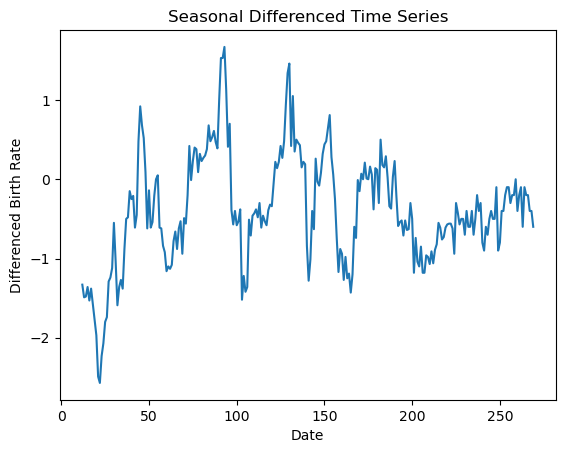

ADF 테스트 결과:
ADF 통계량: -3.478097463562172
p-value: 0.008567740575673988
Critical Values:
   1%: -3.457437824930831
   5%: -2.873459364726563
   10%: -2.573122099570008


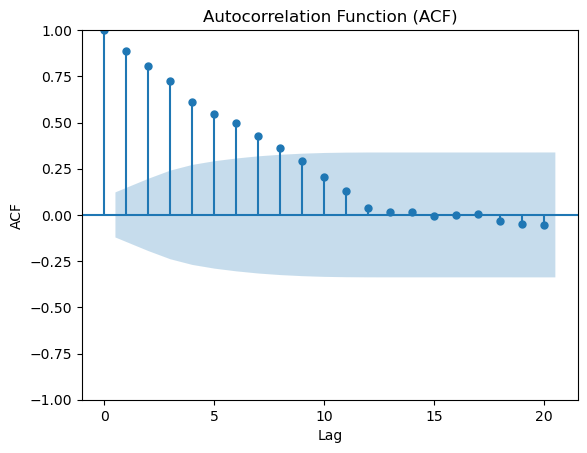

In [17]:
# 계절 차분
data['Seasonal_diff_Birth_rate'] = data['Birth_rate'].diff(12)

# 시계열 그래프
plt.plot(data['Seasonal_diff_Birth_rate'].dropna())
plt.title('Seasonal Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Birth Rate')
plt.show()

# ADF 테스트
adf_result = adfuller(data['Seasonal_diff_Birth_rate'].dropna())
print("ADF 테스트 결과:")
print(f'ADF 통계량: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# ACF 그래프
plot_acf(data['Seasonal_diff_Birth_rate'].dropna(), lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [18]:
from pmdarima import auto_arima

model = auto_arima(data['Birth_rate'], seasonal=True, m=12)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  270
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                 -49.262
Date:                            Sat, 13 Apr 2024   AIC                            114.523
Time:                                    13:07:57   BIC                            143.281
Sample:                                         0   HQIC                           126.073
                                            - 270                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0009      0.002     -0.411      0.681      -0.005       0.004
ma.L1         -0.1997      0.054   

                                      SARIMAX Results                                       
Dep. Variable:                           Birth_rate   No. Observations:                  270
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 -54.759
Date:                              Sat, 13 Apr 2024   AIC                            119.518
Time:                                      13:07:58   BIC                            137.491
Sample:                                  01-01-2000   HQIC                           126.736
                                       - 06-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2110      0.052     -4.082      0.000      -0.312      -0.110
ma.L2          0.07

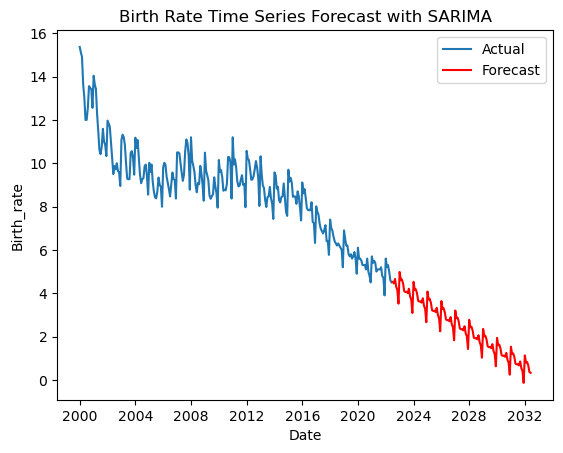

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv('birth_rate.csv')
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)
data = data.asfreq('MS')

order = (0, 1, 2)
seasonal_order = (1, 0, 1, 12)
model = SARIMAX(data['Birth_rate'], order=order, seasonal_order=seasonal_order)
result = model.fit()

print(result.summary())

forecast_steps = 120
forecast = result.get_forecast(steps=forecast_steps)
plt.plot(data.index, data['Birth_rate'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Birth_rate')
plt.title('Birth Rate Time Series Forecast with SARIMA')
plt.legend()
plt.show()

In [20]:
real=pd.read_csv('real_rate.csv')
real['Date'] = pd.to_datetime(real['Date'])
real.head()

,Date,Real_rate
0,2022-07-01,4.7
1,2022-08-01,5.0
2,2022-09-01,5.2
3,2022-10-01,4.7
4,2022-11-01,4.5


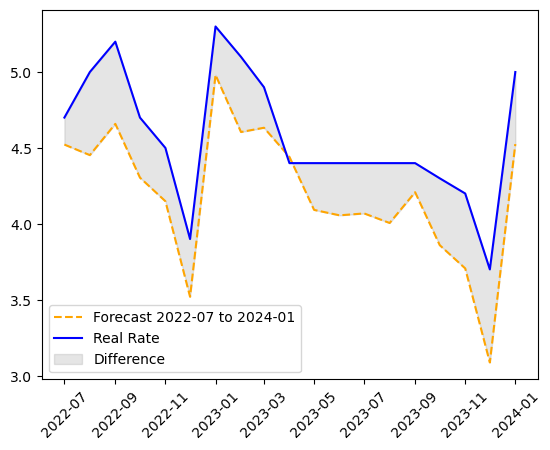

In [21]:
forecast_subset = forecast.predicted_mean['2022-07-01':'2024-01-01']
plt.plot(forecast_subset.index, forecast_subset, color='orange', linestyle='--', label='Forecast 2022-07 to 2024-01')

plt.plot(real['Date'], real['Real_rate'], color='blue', label='Real Rate')

difference = forecast_subset - real['Real_rate']
plt.fill_between(forecast_subset.index, real['Real_rate'], forecast_subset, color='gray', alpha=0.2, label='Difference')

plt.xticks(rotation=45)
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.api import VAR

In [23]:
df=pd.read_csv('var.csv')
data = df.fillna(method='ffill')

data_selected = data[['Birth_rate', 'Marriage_rate']]

model = VAR(data_selected)
result = model.fit()

print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 13, Apr, 2024
Time:                     13:07:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.01963
Nobs:                     269.000    HQIC:                  -1.06761
Log likelihood:          -609.465    FPE:                   0.332936
AIC:                     -1.09981    Det(Omega_mle):        0.325633
--------------------------------------------------------------------
Results for equation Birth_rate
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.177384         0.198657           -0.893           0.372
L1.Birth_rate            0.846927         0.021919           38.640           0.000
L1.Marriage_rate         0.248476         0

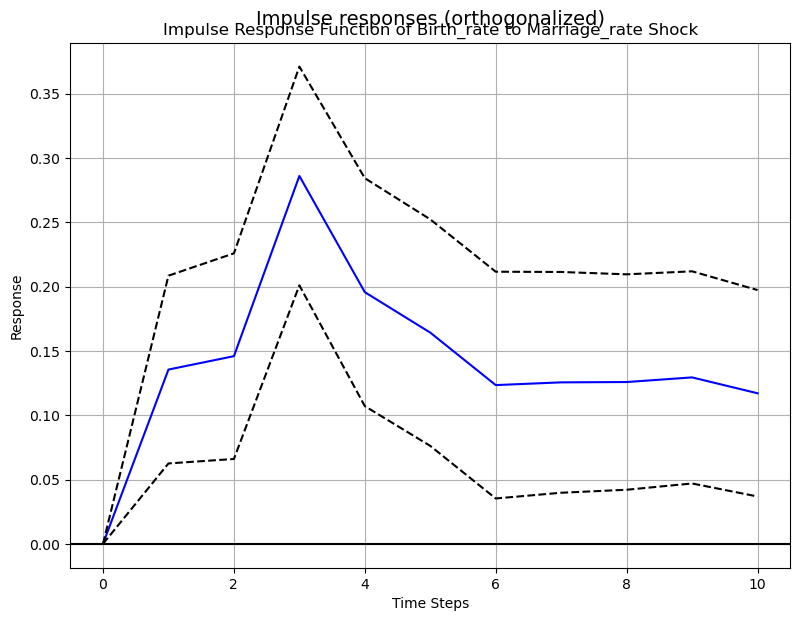

In [24]:
data_selected = data[['Birth_rate', 'Marriage_rate']]
model = VAR(data_selected)
results = model.fit(maxlags=4)

irf = results.irf()

irf.plot(orth=True, impulse='Marriage_rate', response='Birth_rate', figsize=(8, 6))
plt.title('Impulse Response Function of Birth_rate to Marriage_rate Shock')
plt.xlabel('Time Steps')
plt.ylabel('Response')
plt.grid(True)
plt.show()